# Constructing the baseball data set

This notebook constructs the rookies data set for the application of the constrained denoisings methods to the baseball. The major and minor league batters data sets were all taken from FanGraphs.

In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

We construct a data set consisting of the minor and major league RBI for all players in their first season of major league play. (Technically speaking, these are not necessarily rookie players; "rookie" has a more precise meaning considering the first season at which some number of games-played and/or at-bat criterion are met.)

In [31]:
maj_2024 = pd.read_csv('major_2024_batters.csv')
rookies = pd.DataFrame(columns=maj_2024.columns)

for y in [2022, 2023, 2024]:
    maj_curr = pd.read_csv('major_%s_batters.csv' % str(y))
    maj_prev = pd.read_csv('major_%s_batters.csv' % (str(y-1)))
    min_prev = pd.read_csv('minor_%s_batters.csv' % (str(y-1)))
    pitchers_curr = pd.read_csv('major_%s_pitchers.csv' % str(y))
    
    rookies_curr = maj_curr.loc[maj_curr['Name'].isin(min_prev['Name'])
                           & ~maj_curr['Name'].isin(pitchers_curr['Name'])
                           & ~maj_curr['Name'].isin(maj_prev['Name'])].rename(columns={'RBI':'majRBI','G':'majG'})
    rookies_curr = rookies_curr.merge(min_prev[['Name','RBI','G']], how='left', on=['Name'])
    rookies_curr.rename(columns={'RBI':'minRBI','G':'minG'}, inplace=True)

    rookies = pd.concat([rookies, rookies_curr], axis=0)
    
rookies.reset_index(drop=True, inplace=True)    
rookies = rookies[['Name','minG','minRBI','majG','majRBI']]
rookies

,Name,minG,minRBI,majG,majRBI
0,Julio Rodriguez,74.0,47.0,132.0,75.0
1,Adley Rutschman,123.0,75.0,113.0,42.0
2,Michael Harris II,101.0,64.0,114.0,64.0
3,Brendan Donovan,108.0,66.0,126.0,45.0
4,Bobby Witt Jr.,123.0,97.0,150.0,80.0
...,...,...,...,...,...
319,Coby Mayo,140.0,99.0,17.0,0.0
320,Trey Lipscomb,129.0,72.0,61.0,10.0
321,Niko Goodrum,65.0,36.0,13.0,0.0
322,Justin Foscue,122.0,84.0,15.0,1.0


As a sanity check, let's visualize the data set. That is, we plot the joint distribution of minor and major league RBI $Z_i$, minor and major league games played $\lambda_i$, and their ratio $Z_i/\lambda_i$.

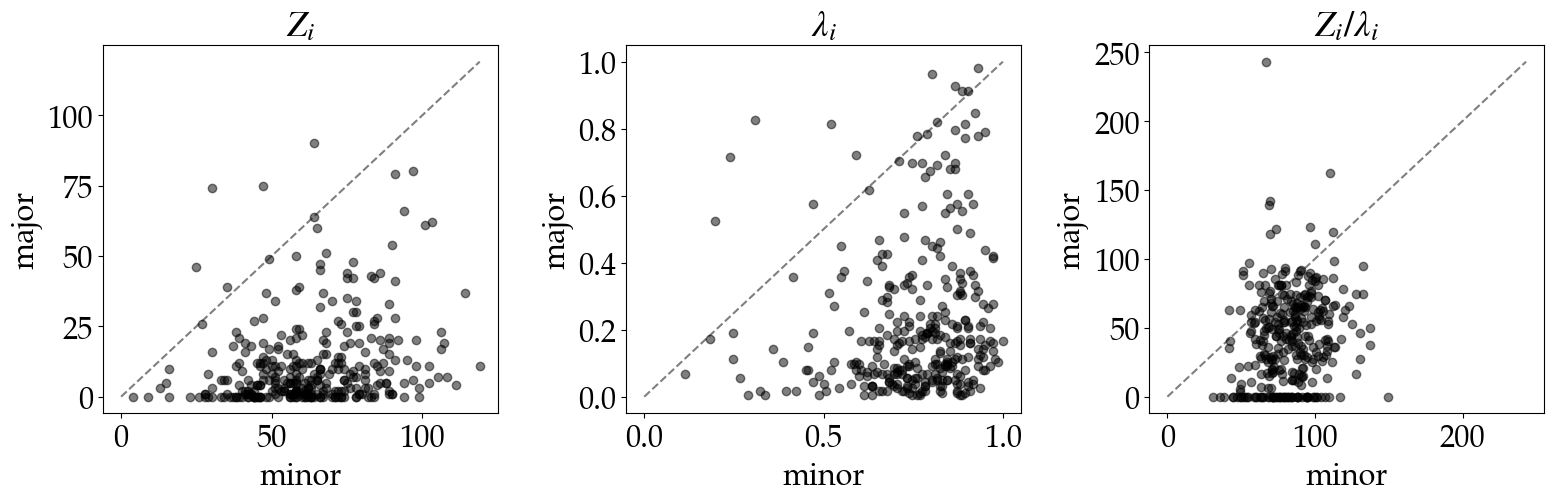

In [29]:
plt.rcParams.update({'font.size': 22,
                    'mathtext.fontset': 'stix',
                    'font.family': 'serif',
                    'font.serif':'Palatino'})

fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(16,5.5))

ax[0].set_title('$Z_i$')
ax[0].set_ylabel('major')
ax[0].set_xlabel('minor')
ax[0].scatter(rookies['minRBI'],rookies['majRBI'], alpha=0.5, color='black')
M = max(np.max(rookies['minRBI']),np.max(rookies['majRBI']))
x = np.linspace(0,M)
ax[0].plot(x,x,color='black',linestyle='dashed',alpha=0.5)

ax[1].set_title('$\\lambda_i$')
ax[1].set_ylabel('major')
ax[1].set_xlabel('minor')
ax[1].scatter(rookies['minG']/142,rookies['majG']/162, alpha=0.5, color='black')
M = max(np.max(rookies['minG']/142),np.max(rookies['majG']/162))
x = np.linspace(0,M)
ax[1].plot(x,x,color='black',linestyle='dashed',alpha=0.5)

ax[2].set_title('$Z_i/\\lambda_i$')
ax[2].set_ylabel('major')
ax[2].set_xlabel('minor')
ax[2].scatter(rookies['minRBI']/(rookies['minG']/142),rookies['majRBI']/(rookies['majG']/162), alpha=0.5, color='black')
M = max(np.max(rookies['minRBI']/(rookies['minG']/142)),np.max(rookies['majRBI']/(rookies['majG']/162)))
x = np.linspace(0,M)
ax[2].plot(x,x,color='black',linestyle='dashed',alpha=0.5)

plt.tight_layout()

Now let's save the data in an external pickle file.

In [30]:
rookies.to_pickle("./baseball_data.pkl")  